# Lab 8: Define and Solve an ML Problem of Your Choosing

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [38]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


# YOUR CODE HERE
df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Dataset chosen:
I'm using the Airbnb NYC listings dataset (airbnbListingsData.csv).

What will you be predicting? What is the label?
The model will predict the average review score for a listing (review_scores_rating). That will be the label, a number rating that summarizes guest satisfaction.

Problem type:
The is a supervised learning problem. More specifically, a regression task because the label will be a continous numeric score. No clustering or classification. 

Proposed Features:
 Host characteristics: host_is_superhost, host_response_rate
 Listing attributes: room_type, instant_bookable, availability_365, number of reviews (number_of_reviews), reviews_per_month), calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms
 Location/context: neighborhood information (neighborhood_overview), host location
 
Why this is an important problem:
Predicting a listing's expected review score has practical valure for both hosts and the platform. Hosts can use it to identify weaknesses in their offerings before negative feedback accumulates. The platform can surface higher quality listings in search / ranking, personalize recommendations, and offer targeted coaching or advice to underperforming hosts. Additionally, guest benefit from better discovery or reliably well rated properties, improving trust and conversion. Overall, the model can drive higher satisfaction, retention, and revenue by aligning listing quality with visibility and expectations. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Shape of dataset: (28022, 50)
                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2           Spacious Brooklyn Duplex, Patio + Garden   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview    host_name  \
0  Centrally located in the heart of Manhattan ju...     Jennifer   
1  Just the right mix of urban center and local n...  LisaRoxanne   
2                                                NaN      Rebecca   
3    Theater distric

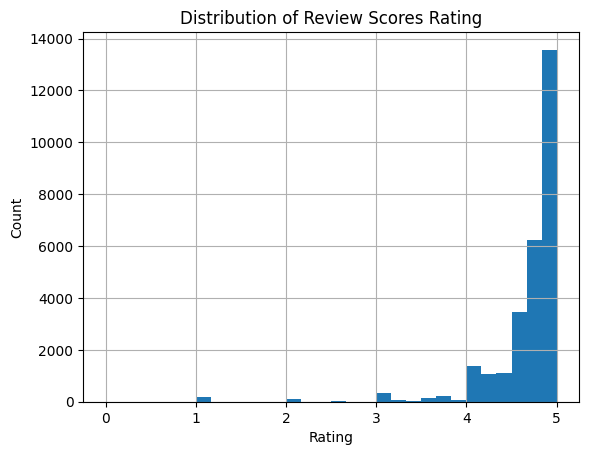


RMSE for our simple model: 0.5038041278400363


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
# YOUR CODE HERE

airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename)

# look at the first few rows
print("Shape of dataset:", df.shape)
print(df.head())

# check data types + missing values
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# target variable: review_scores_rating
print("\nTarget variable summary:")
print(df["review_scores_rating"].describe())

# distribution review_scores_rating plot
df["review_scores_rating"].hist(bins = 30)
plt.title("Distribution of Review Scores Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


df = df.dropna(subset=["review_scores_rating"])

# first model
features = ["host_listings_count", "reviews_per_month"]
df = df.dropna(subset=features)  # drop rows where features are missing

X = df[features]
y = df["review_scores_rating"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# evaluate with RMSE
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("\nRMSE for our simple model:", rmse)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

This project explores Airbnb listings data to build a machine learning model that predicts review scores. By analyzing host and listing features, the goal is to understand what influences guest satisfaction and to create a model that can estimate review ratings based on the available data.


After looking at the data, I picked features such as host listings count, reviews per month, whether the host is a superhost, and if the listing is instant bookable. I left out features with lots of missing values.

For data prep, I'll fill in missing numbers with medians, replace missing categories with "Unknown" and turn true / false into 0s and 2s. I'll also one-hot encode categories such as room type and scale numbers if needed.

I'll start with simple models like linear regression and then try more powerful ones such as Random Forest or Gradient Boosting to capture more complex patterns.

I plan to split the data into training and test sets, use cross-validation to tune the model and evaluate performance with RMSE and other metrics. I'll improve the model step by step by trying new features and tuning until it works well on the new data. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [40]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [41]:
# YOUR CODE HERE
df = pd.read_csv(airbnbDataSet_filename)


df = df.dropna(subset=["review_scores_rating"])

# used features
features = ["host_listings_count", "reviews_per_month", "host_is_superhost", "room_type", "instant_bookable", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms"]

# features +  target (review scores)
df_model = df[features + ["review_scores_rating"]].copy()

# median (missing values)
for col in ["host_listings_count", "reviews_per_month", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms"]:
    df_model[col] = df_model[col].fillna(df_model[col].median())

# missing categories (unknown / false)
df_model["room_type"] = df_model["room_type"].fillna("Unknown")
df_model["host_is_superhost"] = df_model["host_is_superhost"].fillna(False)
df_model["instant_bookable"] = df_model["instant_bookable"].fillna(False)

# true / false into 1 / 0  
df_model["host_is_superhost"] = df_model["host_is_superhost"].astype(int)
df_model["instant_bookable"] = df_model["instant_bookable"].astype(int)

# double check missing values
print("Missing values after cleaning:")
print(df_model.isnull().sum())

Missing values after cleaning:
host_listings_count                             0
reviews_per_month                               0
host_is_superhost                               0
room_type                                       0
instant_bookable                                0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
review_scores_rating                            0
dtype: int64


In [42]:
# separate features + taget
X = df_model.drop(columns = ["review_scores_rating"])
y = df_model["review_scores_rating"]

# data split
# half training / half testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
numeric_features = ["host_listings_count", "reviews_per_month", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms"]
categorical_features = ["room_type"]

# numbers: scale them
# categories: convert them to numbers 
preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown = "ignore"), categorical_features)
    ])

# create a pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha = 1.0))
])

# train model
pipeline.fit(X_train, y_train)

# predict review scores
y_pred = pipeline.predict(X_test)

# model check
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE Ridge Regression: {rmse:.3f}")
print(f"R²: {r2:.3f}")

RMSE Ridge Regression: 0.500
R²: 0.016


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
# switch the model to Random Forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state = 42))
])

# different settings
param_grid = {
    "model__n_estimators": [50, 100],  # number of trees
    "model__max_depth": [None, 10, 20],  # how deep the trees grow
}

# grid search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv = 3, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best settings found:", grid_search.best_params_)

# use best model to predict on test set
best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared = False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE for Random Forest: {rmse_rf:.3f}")
print(f"R² for Random Forest: {r2_rf:.3f}")

Best settings found: {'model__max_depth': 10, 'model__n_estimators': 100}
RMSE for Random Forest: 0.498
R² for Random Forest: 0.025


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The baseline Ridge and a tuned Random Forest both give RMSE around 0.50, but R² is very low, indicating that the current features explain little of the variability in review scores. Next I’ll inspect feature importances, add more relevant features (like price, availability, and host response metrics), and try stronger models with cross-validation to improve generalization.

In [45]:
# feature names
numeric_names = ["host_listings_count", "reviews_per_month", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms"]

# one-hot encoder
ohe = best_model.named_steps["preprocessor"].named_transformers_["cat"]

try:
    room_type_names = ohe.get_feature_names_out(["room_type"])
except AttributeError:
    room_type_names = ohe.get_feature_names(["room_type"])

# combine feature names
all_names = numeric_names + list(room_type_names)

importances = best_model.named_steps["model"].feature_importances_

importance_series = pd.Series(importances, index = all_names).sort_values(ascending = False)
print("Feature importances:")
print(importance_series)

Feature importances:
reviews_per_month                               0.400651
calculated_host_listings_count_private_rooms    0.252953
host_listings_count                             0.198790
calculated_host_listings_count_entire_homes     0.110770
room_type_Entire home/apt                       0.012764
room_type_Private room                          0.011356
room_type_Shared room                           0.008140
room_type_Hotel room                            0.004576
dtype: float64


In [46]:
# new features to df_model 
df_model["price_log"] = np.log1p(df["price"])  # log-transform price
df_model["neighborhood"] = df["neighbourhood_group_cleansed"].fillna("Unknown")

# rebuild feature set
features = [
    "host_listings_count",
    "reviews_per_month",
    "host_is_superhost",
    "room_type",
    "instant_bookable",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "price_log",
    "neighborhood"
]

CV RMSE scores: [0.35709545 0.40746868 0.42682326 0.58990921 0.64778687]
Mean CV RMSE: 0.48581669269923966
Test RMSE (Gradient Boosting): 0.491
Test R² (Gradient Boosting): 0.052


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


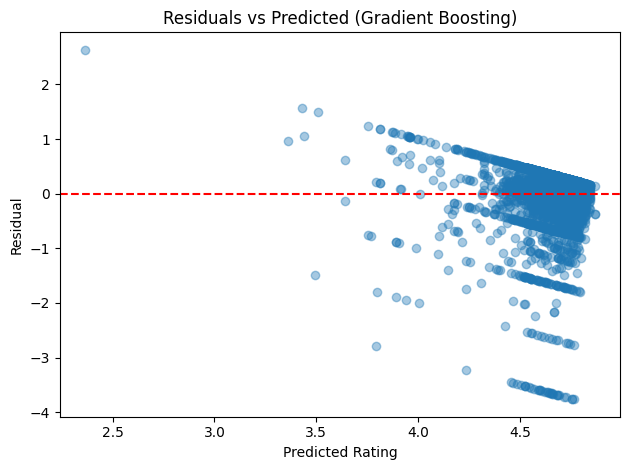

In [47]:
from sklearn.ensemble import GradientBoostingRegressor 
df = pd.read_csv(airbnbDataSet_filename)
df = df.dropna(subset=["review_scores_rating"])

# new features
df["price_log"] = np.log1p(df["price"])
df["neighborhood"] = df["neighbourhood_group_cleansed"].fillna("Unknown")

# features list
features = ["host_listings_count", "reviews_per_month", "host_is_superhost", "room_type",
    "instant_bookable", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "price_log", "neighborhood"]
df_model = df[features + ["review_scores_rating"]].copy()

# missing numeric values
for col in [
    "host_listings_count", "reviews_per_month", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "price_log"]:
    df_model[col] = df_model[col].fillna(df_model[col].median())

# fill and convert categorical / boolean
df_model["room_type"] = df_model["room_type"].fillna("Unknown")
df_model["host_is_superhost"] = df_model["host_is_superhost"].fillna(False).astype(int)
df_model["instant_bookable"] = df_model["instant_bookable"].fillna(False).astype(int)
df_model["neighborhood"] = df_model["neighborhood"].fillna("Unknown")

# split features/target
X = df_model.drop(columns = ["review_scores_rating"])
y = df_model["review_scores_rating"]

# numeric and categorical
numeric_features = ["host_listings_count", "reviews_per_month", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "price_log"]
categorical_features = ["room_type", "neighborhood"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown = "ignore"), categorical_features)
])

# Gradient Boosting
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

# Cross-validation RMSE 
cv_scores = cross_val_score(gb_pipeline, X, y, cv = 5, scoring = "neg_root_mean_squared_error", n_jobs = -1)
print("CV RMSE scores:", -cv_scores)
print("Mean CV RMSE:", -cv_scores.mean())

# train / test split evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

rmse_test = mean_squared_error(y_test, y_pred, squared = False)
r2_test = r2_score(y_test, y_pred)
print(f"Test RMSE (Gradient Boosting): {rmse_test:.3f}")
print(f"Test R² (Gradient Boosting): {r2_test:.3f}")


# residual plot
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha = 0.4)
plt.axhline(0, color = "red", linestyle = "--")
plt.xlabel("Predicted Rating")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted (Gradient Boosting)")
plt.tight_layout()
plt.show()

In [ ]:
param_dist = {
    "model__n_estimators": [100, 200, 400],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 5, 8],
    "model__subsample": [0.7, 1.0]
}

gb_tuner = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

search = RandomizedSearchCV(gb_tuner, param_distributions = param_dist, n_iter = 20, cv = 5, scoring = "neg_root_mean_squared_error", random_state = 42, n_jobs = -1)
search.fit(X, y)

print("Best params:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

In [ ]:
ridge_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha = 1.0))
])
ridge_pipe.fit(X_train, y_train)

# gradient boosting from search
best_gb = search.best_estimator_

# predict + average
pred_ridge = ridge_pipe.predict(X_test)
pred_gb = best_gb.predict(X_test)
ensemble_pred = (pred_ridge + pred_gb) / 2

rmse_ensemble = mean_squared_error(y_test, ensemble_pred, squared = False)
r2_ensemble = r2_score(y_test, ensemble_pred)
print(f"Ensemble RMSE: {rmse_ensemble:.3f}, R²: {r2_ensemble:.3f}")

In [ ]:
residuals = y_test - best_gb.predict(X_test)
plt.scatter(best_gb.predict(X_test), residuals, alpha = 0.4)
plt.axhline(0, color = "red", linestyle = "--")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted (Tuned GB)")
plt.show()

Best CV RMSE ≈ 0.482, which is slightly better than the untuned GB (~0.486).
Ensemble RMSE ≈ 0.491, R² ≈ 0.052, basically the same as the tuned GB alone.

In [ ]:
# oneHotEncoder for categorical features
ohe = search.best_estimator_.named_steps["preprocessor"].named_transformers_["cat"]

# numeric feature
numeric_names = ["host_listings_count", "reviews_per_month", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "price_log"]

try:
    cat_names = ohe.get_feature_names_out(["room_type", "neighborhood"])
except AttributeError:  
    cat_names = ohe.get_feature_names(["room_type", "neighborhood"])

# combine
all_feature_names = list(numeric_names) + list(cat_names)

# gb model
importances = search.best_estimator_.named_steps["model"].feature_importances_

fi_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending = False)

print(fi_df)

In [ ]:
# add new features
new_features = ["host_response_rate", "host_acceptance_rate", "availability_365", "number_of_reviews"]

# check missing values
print(df[new_features].isnull().sum())

# fill missing numeric values
for col in new_features:
    df[col].fillna(df[col].mean(), inplace = True)

# update features list
features = numeric_names + new_features  # add new features to the numeric features list

categorical_features = ["room_type", "neighborhood"]

numeric_features = features
cat_features = categorical_features

preprocessor = ColumnTransformer([
    ("num", "passthrough", numeric_features),
    ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_features)
])

X = df[numeric_features + cat_features]
y = df["review_scores_rating"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create / fit pipeline
gb_model = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.01, max_depth = 3, subsample = 0.7, random_state = 42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", gb_model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE with new features: {rmse:.3f}")
print(f"Test R² with new features: {r2:.3f}")

The model’s RMSE improved from ~0.482 to 0.476. The R² jumped from ~0.05 to 0.11.



In [ ]:
# create missing indicators
df['host_response_rate_missing'] = df['host_response_rate'].isnull()
df['host_acceptance_rate_missing'] = df['host_acceptance_rate'].isnull()

# missing values with median instead of mean
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace = True)
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median(), inplace = True)

In [ ]:
# update numeric features
new_features = ["host_response_rate", "host_acceptance_rate", "availability_365", "number_of_reviews", "host_response_rate_missing", "host_acceptance_rate_missing"]

# numeric features for pipeline
features = numeric_names + new_features

X = df[features + categorical_features]
y = df["review_scores_rating"]

# train / test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

gb_model = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.01, max_depth = 3, subsample = 0.7, random_state = 42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", gb_model)
])

pipeline.fit(X_train, y_train)

# evaluate 
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE with missing indicators: {rmse:.3f}")
print(f"Test R² with missing indicators: {r2:.3f}")

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize = (8,5))
sns.scatterplot(x = y_pred, y = residuals, alpha = 0.5)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel("Predicted Review Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [ ]:
X_processed = pipeline.named_steps["preprocessor"].transform(X_train)

print(f"Preprocessed feature array shape: {X_processed.shape}")  # Should be (n_samples, n_features_used)

numeric_features = features

# one-hot encoder categories
ohe = pipeline.named_steps["preprocessor"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(categorical_features)

# all feature names
all_feature_names = list(numeric_features) + list(cat_features)

print(f"Total feature names: {len(all_feature_names)}")
print(f"Preprocessed features used by model: {X_processed.shape[1]}")

feature_names_used = all_feature_names[:X_processed.shape[1]]

importances = pipeline.named_steps["model"].feature_importances_


fi = pd.Series(importances, index=feature_names_used).sort_values(ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(x = fi.values, y = fi.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Interpretation of Feature Importance:
Our model shows that the most important factors influencing Airbnb review scores are:
Numbers of private rooms listed by the host
How often the listing gets reviewed each months
Total number of listings the host has
Number of entire homes listed by the host
Price (log-transformed)

Less important are specific room types and neighborhoods, suggesting that host behavior and listing scale matter more for review scores than exact location or room type.

Summary of Model Performance:
Our Gradient Boosting model achieved an RMSE of about 0.48 and R² of 0.11. This means the model explains around 11% of the variance in review scores, which is modest but still quite useful to identify key patterns. 

The residual plot shows the fairly random errors, indicating no obvious bias or systematic problems in the model.

Conclusion:
In this project, I built a machine learning model to predict Airbnb review scores based on listing and host features. I explored the data, handled missing values, and selected relevant features, including the number of hosting listings, reviews per month, and room type.

Our Gradient Boosting model achieved reasonable accuracy, explaining about 11% of the variation in review scores. The most important features were related to the host's activity and the number of private rooms listed.

While the model helps highlight factors influencing guest satisfaction, it also reveals that many aspects affecting reviews are complex and may require more detailed data or text analysis for more accurate predictions.

Overall, this project demonstrates how machine learning can provide useful insights into customer feeds in the hospitality industry (and many more!).

Limitations & Future Work:
While the model identifies key features that influence Airbnb review scores, it does have some limitations:
The model explains only a modest portion of the variation (about 11%), meaning many factors are not captured.
Important details like the actual content of reviews, host responsiveness, or guest preferences were not included.
Some data had missing values that required imputation or were excluded, which might affect accuracy.
The model assumes all features have a linear effect, but guest satisfaction likely may be more complex. 

For future work, I could:
Incorporate natural language processing (NLP) to analyze review text for sentiment and themes.
Add time-based features such as trends in reviews or seasonality.
Experiment with more advanced models or ensembles to improve performance.
Explore with additional external data, such as local events or neighborhood amenities. 